## MolGraph

In [74]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

# import molgraph
# print(dir(molgraph)) # needed molgraph==0.8.0 for chemistry module

import molgraph
from molgraph.chemistry import features, Featurizer, MolecularGraphEncoder
from tensorflow import keras



In [75]:
data = pd.read_csv('delaney-processed.csv')
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [76]:
print(dir(features))

['ABC', 'Any', 'Aromatic', 'BondType', 'CIPCode', 'Callable', 'Chem', 'ChiralCenter', 'Conjugated', 'Crippen', 'CrippenLogPContribution', 'CrippenMolarRefractivityContribution', 'Degree', 'Feature', 'FeatureFactory', 'FormalCharge', 'GasteigerCharge', 'Hetero', 'Hybridization', 'HydrogenAcceptor', 'HydrogenDonor', 'LabuteASAContribution', 'Lipinski', 'List', 'NumRadicalElectrons', 'Optional', 'Ring', 'RingSize', 'Rotatable', 'Sequence', 'Stereo', 'Symbol', 'TPSAContribution', 'TotalNumHs', 'TotalValence', 'Union', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_defaults', 'abstractmethod', 'atom_features', 'bond_features', 'math', 'rdMolDescriptors', 'rdPartialCharges']


In [77]:
# Atom and bond encoders
atom_encoder = Featurizer([features.Symbol(),features.Hybridization()])
print('atom_encoder', atom_encoder)
bond_encoder = Featurizer([features.BondType()])
print('bond_encoder', bond_encoder)
encoder = MolecularGraphEncoder(atom_encoder, bond_encoder)

atom_encoder Featurizer(features=[Symbol(allowable_set=['Ac', 'Ag', 'Al', 'Am', 'Ar', 'As', 'At', 'Au', 'B', 'Ba', 'Be', 'Bh', 'Bi', 'Bk', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cf', 'Cl', 'Cm', 'Cn', 'Co', 'Cr', 'Cs', 'Cu', 'Db', 'Ds', 'Dy', 'Er', 'Es', 'Eu', 'F', 'Fe', 'Fm', 'Fr', 'Ga', 'Gd', 'Ge', 'H', 'He', 'Hf', 'Hg', 'Ho', 'Hs', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lr', 'Lu', 'Md', 'Mg', 'Mn', 'Mo', 'Mt', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'No', 'Np', 'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pm', 'Po', 'Pr', 'Pt', 'Pu', 'Ra', 'Rb', 'Re', 'Rf', 'Rg', 'Rh', 'Rn', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Sg', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr'], ordinal=False, oov_size=0), Hybridization(allowable_set=['S', 'SP', 'SP2', 'SP3', 'SP3D', 'SP3D2', 'UNSPECIFIED'], ordinal=False, oov_size=0)])
bond_encoder Featurizer(features=[BondType(allowable_set=['AROMATIC', 'DOUBLE', 'SINGLE', 'TRIPLE'], ordinal=False, oov_size=0)])


In [78]:
# Graph inputs (X) and labels (y)
X = encoder(data['smiles'].tolist())
y = data['measured log solubility in mols per litre'].values
smiles = data['smiles'].tolist()

In [79]:
print("Number of molecules:", len(smiles))
print("Number of labels:", len(y))

Number of molecules: 1128
Number of labels: 1128


In [ ]:
# smiles = data['smiles'].tolist()[146]
# smiles

'CO'

In [ ]:
# X[146].data
# on the first component of array, 1 corresponds to the first atom in the molecule (C)
# on the second component, 1 corresponds to the second atom in the molecule (O)
# same index as atom_encoder

{'node_feature': <tf.Tensor: shape=(2, 119), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.

Both atoms in CO molecule are sp3 hybridized. From `atom_encoder` sp3 is 4th to last and we see 1's there in both components of 2D array above as well.

From `bond_encoder`, this is a 'TRIPLE' bond (3rd position in last array above)

### K-Fold Cross Validation


In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores, rmse_scores, r2_scores = [], [], []


fold = 1
for train_index, val_index in kf.split(smiles):
    print(f"\n--- Fold {fold} ---")
    
    # Split SMILES and targets
    smiles_train = [smiles[i] for i in train_index]
    smiles_val   = [smiles[i] for i in val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # encode separately
    X_train = encoder(smiles_train)
    X_val   = encoder(smiles_val)

    # build model (rebuild fresh for each fold)
    model = keras.Sequential([
        keras.Input(type_spec=X_train.spec),
        molgraph.layers.GATConv(),
        molgraph.layers.GATConv(),
        molgraph.layers.Readout('mean'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mean_squared_error'
    )

    # early stopping
    callback = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )

    # train
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0,
        callbacks=[callback]
    )

    # evaluate
    y_pred = model.predict(X_val).flatten()
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"Fold {fold} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    fold += 1

# average performance
print("\n=== Cross-validation results ===")
print(f"Avg MSE:  {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Avg RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Avg R²:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")



--- Fold 1 ---
8/8 [==============================] - 0s 3ms/step
Fold 1 - MSE: 1.5627, RMSE: 1.2501, R²: 0.6694

--- Fold 2 ---
8/8 [==============================] - 0s 3ms/step
Fold 2 - MSE: 1.4902, RMSE: 1.2207, R²: 0.6546

--- Fold 3 ---
8/8 [==============================] - 0s 2ms/step
Fold 3 - MSE: 1.6627, RMSE: 1.2895, R²: 0.5989

--- Fold 4 ---
8/8 [==============================] - 0s 2ms/step
Fold 4 - MSE: 1.5565, RMSE: 1.2476, R²: 0.6470

--- Fold 5 ---
8/8 [==============================] - 0s 2ms/step
Fold 5 - MSE: 1.8559, RMSE: 1.3623, R²: 0.5625

=== Cross-validation results ===
Avg MSE:  1.6256 ± 0.1276
Avg RMSE: 1.2740 ± 0.0493
Avg R²:   0.6265 ± 0.0398


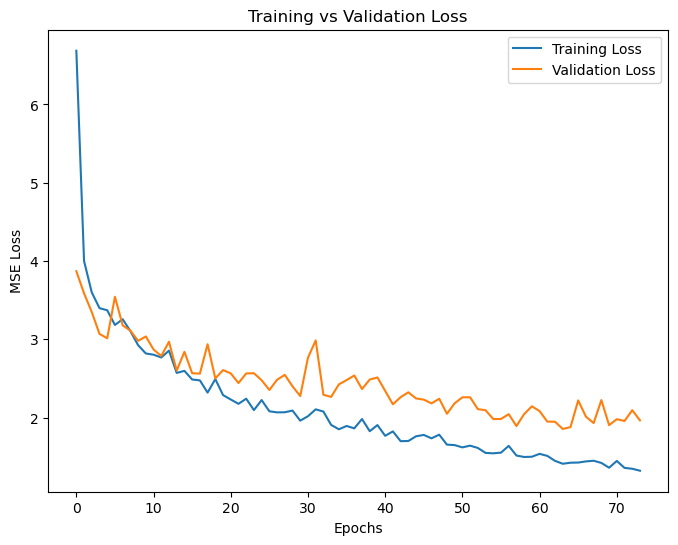

In [81]:
train_loss = history.history['loss']
val_loss = history.history.get('val_loss')  # will be None if you didn't use validation

plt.figure(figsize=(8,6))
plt.plot(train_loss, label='Training Loss')
if val_loss is not None:
    plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()